In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

from utilities import *

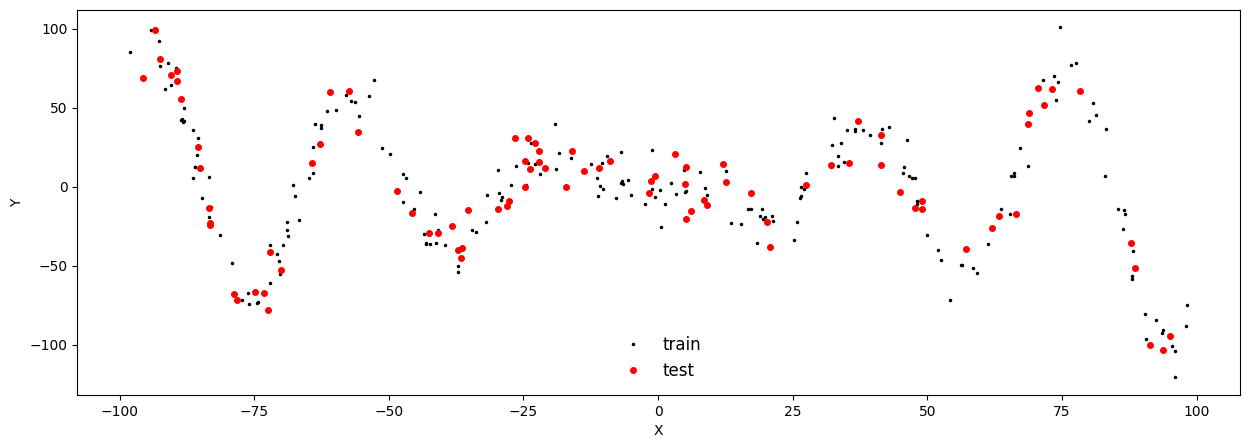

In [100]:
sample_size = 300
variance = 10
scale = 100
period = 6


x_train, y_train = data_simulation(int(0.7*sample_size), scale, period, variance)
x_test, y_test = data_simulation(int(0.3*sample_size), scale, period, variance)

# The scatter_plot function is in the utilities script
plt = scatter_plot(x_train, x_test, y_train, y_test)  

Polynomial degree:  0  | MSE train: 1691.9766  | MSE test: 1723.3798
Polynomial degree:  1  | MSE train: 1607.4844  | MSE test: 1674.9269
Polynomial degree:  3  | MSE train: 1336.0251  | MSE test: 1348.9822
Polynomial degree:  5  | MSE train: 1030.0607  | MSE test: 939.8357
Polynomial degree:  10  | MSE train: 864.2291  | MSE test: 829.5405
Polynomial degree:  20  | MSE train: 95.2386  | MSE test: 141.6779
Polynomial degree:  50  | MSE train: 83.6294  | MSE test: 10090.4755


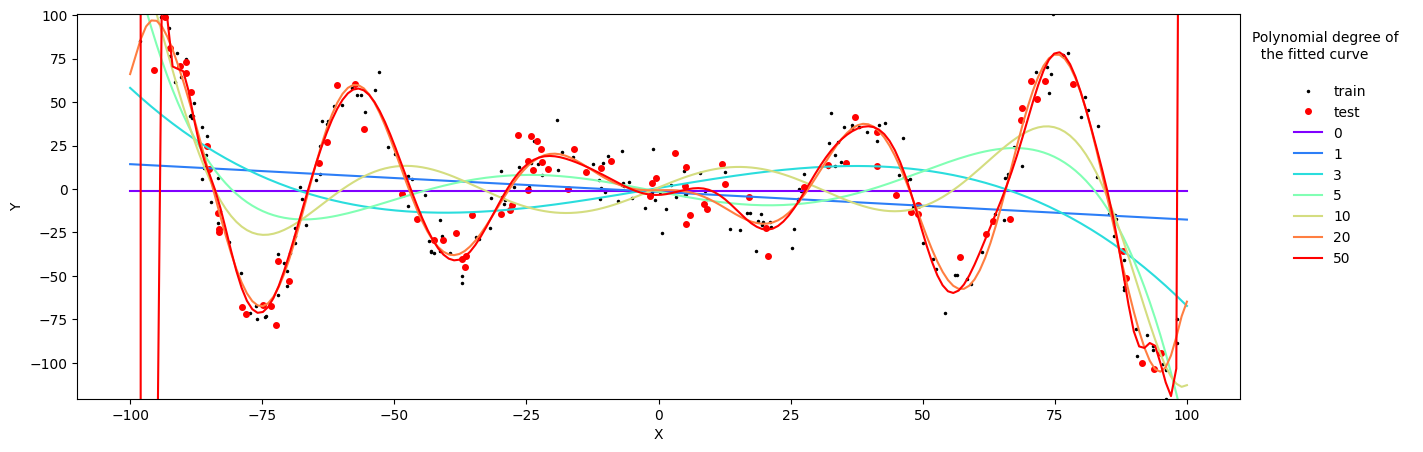

In [101]:
degree = [0, 1, 3, 5, 10, 20, 50]   
plot_polynomial_curves(x_train, x_test, y_train, y_test, degree, scale)

In [102]:
def simu_data(sample_size, w0, w1):
    x = np.random.uniform(0, 1, sample_size)
    x.sort()
    noise = np.random.normal(0, 1, sample_size)
    y = w0 + w1 * x + noise

    return x, y

In [103]:
w_0, w_1 = 2, 3
sample_size = 1000

X, y = simu_data(sample_size, w_0, w_1)
X = [np.ones(len(y)), X]
X = np.array(X).T

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

<module 'matplotlib.pyplot' from 'C:\\Users\\mustapha.bouhsen\\AppData\\Roaming\\Python\\Python312\\site-packages\\matplotlib\\pyplot.py'>

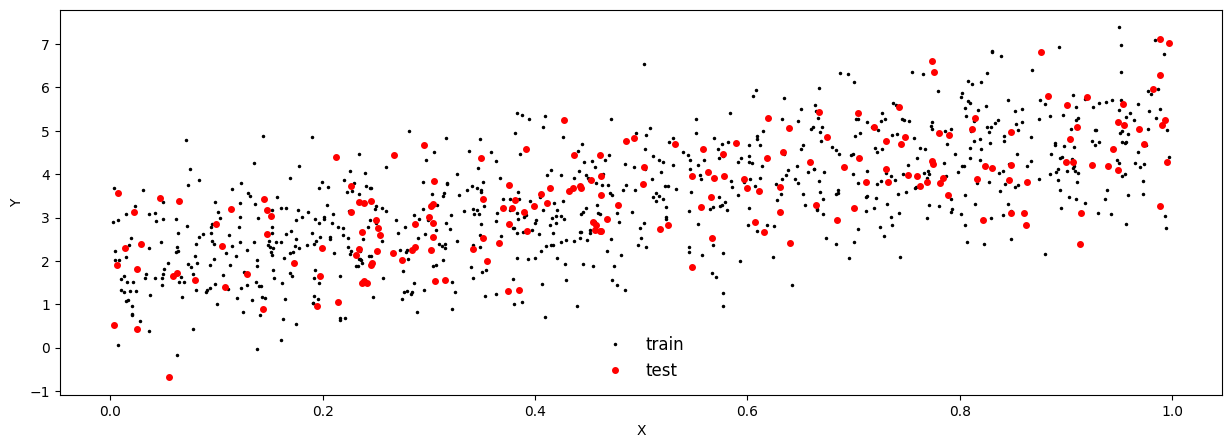

In [105]:
scatter_plot(X_train[:, 1], X_test [:, 1], y_train, y_test) 

In [106]:
def OLS(X, y):
    A = np.linalg.inv(np.dot(X.T, X))
    B = np.dot(X.T, y)

    return(np.dot(A.T, B))

w_ols = OLS(X_train, y_train)

In [107]:
# Train set
y_hat_train = MSE(np.dot(w_ols, X_train.T), y_train)

# Test set
y_hat_test = MSE(np.dot(w_ols, X_test.T), y_test)

print('MSE of the train: ', MSE(y_hat_train, y_train))
print('MSE of the test:  ', MSE(y_hat_test, y_test))

MSE of the train:  7.647900588809182
MSE of the test:   8.7731003251928


In [108]:
bias = w_ols - [w_0, w_1]
print("Bias of w_0: ", bias[0])
print("Bias of the w_1: ", bias[1])

Bias of w_0:  -0.14753777737746177
Bias of the w_1:  0.22700346724206


In [109]:
mc_estimates = 10000   # Fix the number of Monte Carlo estimates that you want to run
M = np.zeros((mc_estimates, 2))  

In [110]:
for k in np.arange(mc_estimates):

    X, y = simu_data(sample_size, w_0, w_1)
    X = [np.ones(len(y)), X]
    X = np.array(X).T

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

    M[k, :] = OLS(X, y)

In [111]:
var = np.var(M, axis=0)
mean = np.mean(M, axis=0)

print('mean: ', mean, '| var: ', var)

mean:  [1.99961081 3.00001433] | var:  [0.00402429 0.01198205]


In [112]:
np.linalg.inv(np.dot(X.T, X)).diagonal()

array([0.00395405, 0.01206103])

In [113]:
def ridge(X, y, lambda_hp):
    A = np.dot(X.T, X)
    B = np.linalg.inv(A + lambda_hp * np.identity(A.shape[1]))
    return np.dot(B.T, np.dot(X.T, y))

In [114]:
ridge(X, y, 0.01)

array([1.93298057, 3.0917751 ])

In [115]:
lambda_hp = 10**3
w_ridge = ridge(X_train, y_train, lambda_hp)

In [116]:
print('Bias W0: ', mean[0] - w_0, 'Bias W1: ', mean[1] - w_1)

Bias W0:  -0.0003891947085117309 Bias W1:  1.4327880568654194e-05


In [117]:
y_hat_train = np.dot(X_train, w_ridge)
y_hat_test = np.dot(X_test, w_ridge)

In [118]:
bias = w_ridge - [w_0, w_1]

print("Bias of w_0: ", bias[0])   # Bias of w_0
print("Bias of the w_1: ", bias[1])   # Bias of w_1

Bias of w_0:  -0.6512502185734526
Bias of the w_1:  -2.186461582524829


In [119]:
X_sub_train, X_validation, y_sub_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [132]:
losses_stack_sub_train, losses_stack_train = [], []
losses_stack_validation, losses_stack_test = [], []

In [133]:
for lambda_hp in np.arange(0, 100, 1):
    w_ridge_cv = ridge(X_sub_train, y_sub_train, lambda_hp)

    y_hat_sub_train = np.dot(X_sub_train, w_ridge)
    y_hat_validation = np.dot(X_validation, w_ridge)

    losses_stack_sub_train.append(MSE(y_sub_train, y_hat_sub_train))
    losses_stack_validation.append(MSE(y_validation, y_hat_validation))

    w_ridge = ridge(X_train, y_train, lambda_hp)
    y_hat_train = np.dot(X_train, w_ridge)
    y_hat_test = np.dot(X_test, w_ridge)
    losses_stack_train.append(MSE(y_train, y_hat_train))
    losses_stack_test.append(MSE(y_test, y_hat_test))

The optimal regularization is 1


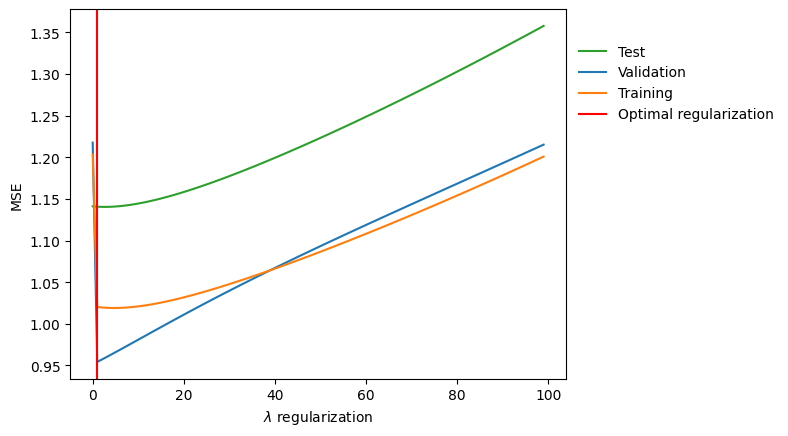

In [134]:
cmap = plt.get_cmap("tab10")

plt.plot(losses_stack_test, label='Test', color=cmap(2))
plt.plot(losses_stack_validation, label='Validation', color=cmap(0))
plt.plot(losses_stack_sub_train, label='Training', color=cmap(1))

plt.axvline(x=np.argmin(losses_stack_validation),color='red', label='Optimal regularization')

plt.xlabel('$\lambda$ regularization')
plt.ylabel('MSE')
leg = plt.gca().legend(loc='center left', bbox_to_anchor=(1, .8))
leg.get_frame().set_alpha(0)
print('The optimal regularization is', np.argmin(losses_stack_validation))

In [135]:
print('TRAIN: OLS estimators:   ', losses_stack_train[0])
print('TRAIN: ridge estimators: ', losses_stack_train[np.argmin(losses_stack_validation)])

print('\nTEST: OLS estimators:   ', losses_stack_test[0])
print('TEST: ridge estimators: ', losses_stack_test[np.argmin(losses_stack_validation)])

TRAIN: OLS estimators:    1.0070137889600161
TRAIN: ridge estimators:  1.0071060043620756

TEST: OLS estimators:    1.1409759636270667
TEST: ridge estimators:  1.1405652954845842


## Variance x Bias

$$
MSE(W0) = \mathbb{E}[(\hat{W0} - W0)^2] = Bias(\hat{W0})^2 + Var(\hat{W0})
$$

In [160]:
w0_MSE = MSE(M[:, 0], w_0)
print('MSE =', w0_MSE)

MSE = 0.004024442651752841


In [161]:
w0_var = np.var(M[:, 0])
w0_bias = (M[:, 0].mean() - w_0)**2

print('variance = ', w0_var)
print('bias^2 = ', w0_bias)

variance =  0.004024291179231708
bias^2 =  1.5147252113422251e-07


In [163]:
print('MSE - (var(w0) + bias(w0)^2) = ',  w0_MSE - (w0_var + w0_bias))

MSE - (var(w0) + bias(w0)^2) =  -8.673617379884035e-19
